<a href="https://colab.research.google.com/github/youmjisun/gachon_3-2/blob/main/8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##완전연결 신경망VS합성곱 신경망
완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 했으나

In [1]:
#파일 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 #4차원배열로 변경

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#합성곱 신경망 만들기
model = keras.Sequential()

In [5]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0

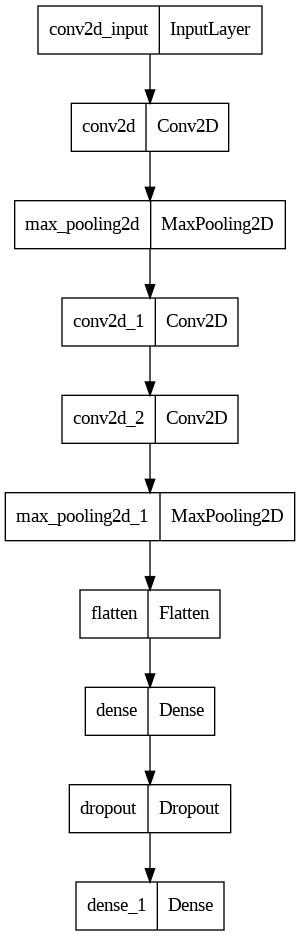

In [8]:
keras.utils.plot_model(model)

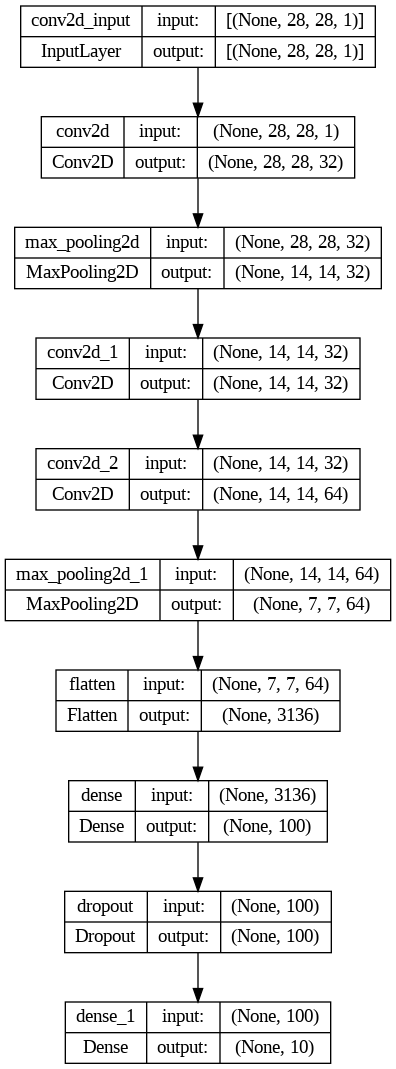

In [9]:
keras.utils.plot_model(model, show_shapes=True)

In [10]:
#모델 컴파인과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 102s 67ms/step - loss: 0.5348 - accuracy: 0.8070 - val_loss: 0.3270 - val_accuracy: 0.8841
Epoch 2/20
   3/1500 [..............................] - ETA: 1:10 - loss: 0.3239 - accuracy: 0.8854

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 100s 66ms/step - loss: 0.3384 - accuracy: 0.8778 - val_loss: 0.2827 - val_accuracy: 0.8942
Epoch 3/20
1500/1500 [==============================] - 98s 65ms/step - loss: 0.2859 - accuracy: 0.8981 - val_loss: 0.2488 - val_accuracy: 0.9059
Epoch 4/20
1500/1500 [==============================] - 113s 75ms/step - loss: 0.2547 - accuracy: 0.9072 - val_loss: 0.2297 - val_accuracy: 0.9133
Epoch 5/20
1500/1500 [==============================] - 98s 65ms/step - loss: 0.2286 - accuracy: 0.9176 - val_loss: 0.2174 - val_accuracy: 0.9204
Epoch 6/20
1500/1500 [==============================] - 110s 73ms/step - loss: 0.2078 - accuracy: 0.9245 - val_loss: 0.2292 - val_accuracy: 0.9182
Epoch 7/20
1500/1500 [==============================] - 95s 64ms/step - loss: 0.1927 - accuracy: 0.9289 - val_loss: 0.2207 - val_accuracy: 0.9173


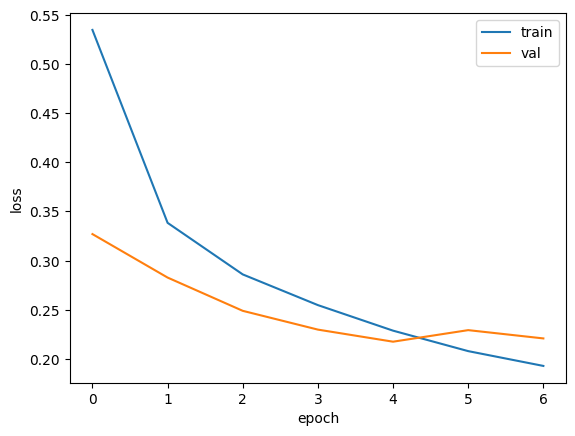

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 8s 20ms/step - loss: 0.2174 - accuracy: 0.9204


[0.21741129457950592, 0.9204166531562805]

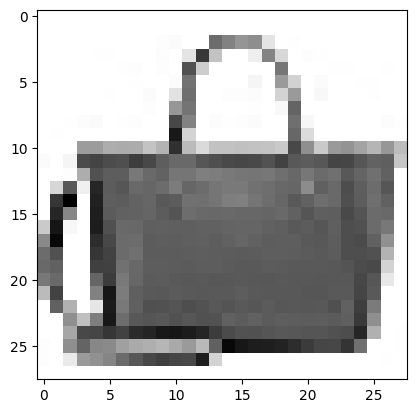

In [13]:
#첫번째 검증 데이터 확인
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 241ms/step
[[6.2913641e-19 1.7241040e-24 5.9409678e-22 1.0490928e-19 6.6255304e-22
  1.6933356e-20 3.4982556e-18 2.3107596e-18 1.0000000e+00 7.6122742e-23]]


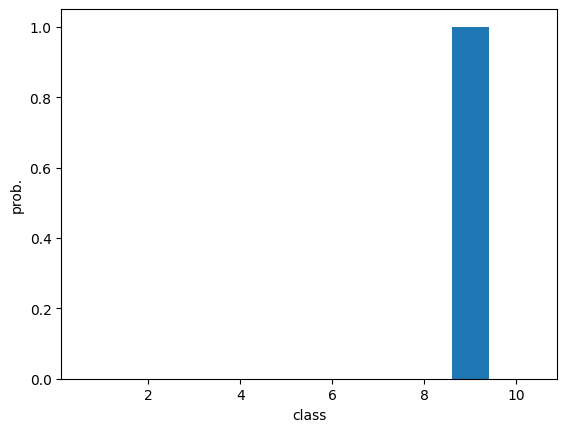

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
#클래스와 비교하여 출력
#클래스 리스트 만들기
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
#클래스의 가장 큰 값 리스트 뽑기
import numpy as np
print(classes[np.argmax(preds)])

가방


In [20]:
#테스트 샘플에 대한 예측을 수정
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 15ms/step - loss: 0.2391 - accuracy: 0.9151


[0.23913715779781342, 0.9150999784469604]